# Predicting Credit Scores
Welcome to this data science project focused on predicting credit scores in the banking industry. In this notebook, we embark on a mission to harness the power of data and machine learning to address a crucial aspect of financial decision-making.

### Mission Objective:
Our primary goal is to develop a robust and accurate predictive model for credit scores. Credit scores play a pivotal role in the world of finance, influencing lending decisions, interest rates, and access to various financial services. By predicting credit scores effectively, we aim to:

* Empower Informed Decisions: Provide financial institutions with a tool to make informed decisions regarding loan approvals, interest rates, and credit limits, ultimately improving risk management.

* Enhance Financial Inclusion: Enable fairer access to credit by identifying individuals who may be creditworthy but are often underserved by traditional credit scoring methods.

* Minimize Defaults: Reduce the risk of defaults by identifying high-risk applicants early in the lending process.

## DATA OVERVIEW

'id': A unique identifier for each data record.

'customer_id': An identifier for each customer, allowing you to associate multiple records with the same individual.

'month': The month of the data record, indicating when the data was collected or relevant.

'name': The name of the customer, which may be used for identification purposes.

'age': The age of the customer, providing information about their age demographic.

'ssn': The Social Security Number (SSN) of the customer, a unique identifier used for verification.

'occupation': The occupation or profession of the customer, which can help understand their employment status.

'annual_income': The annual income of the customer, a crucial financial parameter.

'monthly_inhand_salary': The monthly salary or income available to the customer after deductions.

'num_bank_accounts': The number of bank accounts held by the customer, indicating their banking activity.

'num_credit_card': The number of credit cards held by the customer, reflecting their credit usage.

'interest_rate': The interest rate associated with the customer's financial products, such as loans or credit cards.

'num_of_loan': The number of loans the customer has, providing insight into their debt obligations.

'type_of_loan': The types of loans the customer holds, which can include mortgages, personal loans, etc.

'delay_from_due_date': The delay in payment from the due date for loans or credit cards, indicating their payment behavior.

'num_of_delayed_payment': The number of delayed payments made by the customer.

'changed_credit_limit': Changes in the customer's credit limit, which can affect their credit utilization.

'num_credit_inquiries': The number of credit inquiries made by the customer, potentially affecting their credit score.

'credit_mix': The composition of the customer's credit accounts, which can impact their credit profile.

'outstanding_debt': The amount of outstanding debt owed by the customer.

'credit_utilization_ratio': The ratio of credit used to the total available credit, a key factor in credit scoring.

'credit_history_age': The age of the customer's credit history, influencing their creditworthiness.

'payment_of_min_amount': How customers handle the minimum payment amount on credit cards or loans.

'total_emi_per_month': The total Equated Monthly Installment (EMI) payments made by the customer.

'amount_invested_monthly': The amount the customer invests on a monthly basis, if applicable.

'payment_behaviour': The behavior of the customer regarding their payments, reflecting their financial responsibility.

'monthly_balance': The monthly balance in the customer's financial accounts.

'credit_score': The target variable representing the customer's credit score, which we aim to predict.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/row_data.csv')

In [3]:
df = data.copy()

In [4]:
df.shape

(100000, 28)

In [5]:
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [6]:
df.dtypes

id                           object
customer_id                  object
month                        object
name                         object
age                          object
ssn                          object
occupation                   object
annual_income                object
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                  object
type_of_loan                 object
delay_from_due_date           int64
num_of_delayed_payment       object
changed_credit_limit         object
num_credit_inquiries        float64
credit_mix                   object
outstanding_debt             object
credit_utilization_ratio    float64
credit_history_age           object
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly      object
payment_behaviour            object
monthly_balance              object
credit_score                

In [7]:
pd.set_option('display.max_columns', None)
df.sample(5)

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
71511,0x1b901,CUS_0x3092,August,Ryan Vlastelicat,52,511-20-0282,Mechanic,125415.96,10271.330000,2,3,3,3,"Auto Loan, Personal Loan, and Personal Loan",19,12,8.04,1.0,Good,1145.71,39.139031,33 Years and 5 Months,No,285.441343,135.8390617945096,High_spent_Large_value_payments,845.8525948365617,Standard
49162,0x13610,CUS_0x6915,March,Lashb,17,533-80-5681,Musician,15862.01,1404.834167,10,6,31,6,"Payday Loan, Credit-Builder Loan, Home Equity ...",24,22,24.42,13.0,_,4063.06,27.835034,NaN,Yes,66.782933,63.56908857166791,Low_spent_Small_value_payments,300.13139520213053,Poor
53220,0x14dd6,CUS_0xa20b,May,NaN,22,325-04-2025,Manager,57101.1,4668.425000,7,4,12,1,Mortgage Loan,11,16,2.3,4.0,Good,1303.28,36.817677,25 Years and 6 Months,No,29.448510,190.08271637588382,High_spent_Medium_value_payments,497.3112736681504,Good
10416,0x530a,CUS_0x6339,January,Shalal-Esad,26,539-87-7939,Musician,79741.88,6748.156667,3,7,10,4,"Personal Loan, Not Specified, Not Specified, a...",7,7,6.08,1390.0,Good,227.12_,37.854674,24 Years and 8 Months,No,207.063297,466.36433382066184,Low_spent_Medium_value_payments,281.3880354694101,Standard
56126,0x15edc,CUS_0xb293,July,NaN,19,059-06-4253,Teacher,72152.8,5849.733333,4,7,3,3_,"Personal Loan, Home Equity Loan, and Home Equi...",23,5,9.04,5.0,Good,847.35,36.994094,29 Years and 5 Months,No,171.806567,233.4709340016829,High_spent_Small_value_payments,439.69583245671816,Poor


In [8]:
df.isnull().sum() 

id                              0
customer_id                     0
month                           0
name                         9985
age                             0
ssn                             0
occupation                      0
annual_income                   0
monthly_inhand_salary       15002
num_bank_accounts               0
num_credit_card                 0
interest_rate                   0
num_of_loan                     0
type_of_loan                11408
delay_from_due_date             0
num_of_delayed_payment       7002
changed_credit_limit            0
num_credit_inquiries         1965
credit_mix                      0
outstanding_debt                0
credit_utilization_ratio        0
credit_history_age           9030
payment_of_min_amount           0
total_emi_per_month             0
amount_invested_monthly      4479
payment_behaviour               0
monthly_balance              1200
credit_score                    0
dtype: int64

In [9]:
df.describe()

,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,delay_from_due_date,num_credit_inquiries,credit_utilization_ratio,total_emi_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


## INVESTIGATION COLUMN BY COLUMN

In [10]:
object_columns = df.columns.tolist()

In [11]:
for col in object_columns:
    print('Column Name: '+col)
    print("**"*20)
    print(df[col].value_counts(dropna=False))
    print('END', "--"*18, '\n')

Column Name: id
****************************************
id
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
END ------------------------------------ 

Column Name: customer_id
****************************************
customer_id
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
END ------------------------------------ 

Column Name: month
****************************************
month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
END ------------------------------------ 

Column Name: name
****************************************
name
NaN               9985
Stevex  

amount_invested_monthly
NaN                   4479
__10000__             4305
0.0                    169
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: count, Length: 91050, dtype: int64
END ------------------------------------ 

Column Name: payment_behaviour
****************************************
payment_behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64
END ------------------------------------ 

Column Name: monthly_balance
****************************************
monthly_balance
NaN                                 1200
__-333333333333

#### All column names will be converted to lowercase for the sake of reliability.

In [60]:
df.columns = df.columns.str.lower()
df.to_csv('data/row_data.csv', index=False)

In [12]:
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

## Categorical Features Handling Plan


##### month 
* int64 --> str
* This column will be encoded

##### occupation
* `_______` values will be deleted.
* Values will be imputed using the mode, which represents the most common value associated with each unique Customer_ID
* This column will be encoded.

#####  type_of_loan
* Get every specific loan type.
* Binary encoding. If a person has that specific loan type in the cell, it will be True otherwise False.
* Implement mode imputer to missing values

##### credit_mix
* `_` values will be deleted
* Missing values will be imputed using the mode, which represents the most common value associated with each unique Customer_ID
* This column will be encoded.

##### payment_of_min_amount
* `NM` values will be deleted
* Missing values will be imputed using the mode, which represents the most common value associated with each unique Customer_ID
* This column will be encoded.

##### payment_behaviour
* `!@9#%8` values will be deleted.
* Missing values will be imputed using the mode, which represents the most common value associated with each unique Customer_ID
* This column will be encoded.

##### credit_score
* This column is the target. There are three values; Standard, Poor, Good. They will be replaced as Poor --> 0, Good --> 1, Standard --> 2

##### name / ssn / customer_id
* These columns will be deleted at the end of the categorical feature handling process.

In [13]:
categorical_columns = ['credit_mix',
                      'month',
                      'occupation',
                      'payment_behaviour',
                      'payment_of_min_amount',
                      'type_of_loan',
                      'credit_score',
                      'id',
                      'customer_id',
                      'name',
                      'ssn']

In [14]:
class CategoricalTransformer():
    """
    This class provides methods for handling and transforming categorical features in a DataFrame.

    Parameters:
    - input_df (pd.DataFrame): The input DataFrame containing categorical features.

    Methods:
    - month_handling: Encodes and handles the 'month' column.
    - occupation_handling: Encodes and handles the 'occupation' column.
    - type_of_loan_handling: Handles and encodes the 'type_of_loan' column.
    - credit_mix_handling: Encodes and handles the 'credit_mix' column.
    - payment_of_min_amount_handling: Encodes and handles the 'payment_of_min_amount' column.
    - payment_behaviour_handling: Encodes and handles the 'payment_behaviour' column.
    - credit_score_handling: Encodes the 'credit_score' column.
    - column_deleter: Deletes unnecessary columns and returns the modified DataFrame.

    """
    def __init__(self,input_df:pd.DataFrame):
        self.df = input_df
    
    def month_handling(self) -> pd.DataFrame:
        if 'month' not in self.df.columns:
            raise ValueError ('"month" not found in the DataFrame.')
            
        
        self.df['month'] = self.df['month'].astype(str)
        # Encoding without first value
        month_dummies = pd.get_dummies(self.df['month'], prefix='month', drop_first=True, dtype=int)
        
        # Creating new dataframe with dummies (month_january) and without original column.
        self.df = pd.concat([self.df, month_dummies], axis=1)
        self.df.drop('month', axis=1, inplace=True)
        
        return self.df
        
    def occupation_handling(self) -> pd.DataFrame:
        if 'occupation' not in self.df.columns:
            raise ValueError ('"occupation" not found in the DataFrame.')
        
        # Deleting strange values
        self.df['occupation'] = self.df['occupation'].replace("_______", pd.NA)
        
        # Replacing missing values in each row, associated with a specific customer_id, with the most frequent value.
        self.df['occupation'].astype(str)
        self.df['occupation'] = self.df.groupby('customer_id')['occupation'].transform(lambda x: x.mode()[0])
                
        # Binary encoding without first value.
        occupation_dummies = pd.get_dummies(self.df['occupation'], drop_first=True, prefix='occupation', dtype=int)
        self.df = pd.concat([self.df, occupation_dummies], axis=1)
        self.df.drop('occupation', axis=1, inplace=True)
        
        return self.df
    
    def type_of_loan_handling(self) -> pd.DataFrame:
        '''
        There are values like "Credit-Builder Loan, and Mortgage Loan". Firs of all, this method extracts all 
        specific type of loans (Credit-Builder Loan,Mortgage Loan etc.). Then creates a columns like; "has_creadit_builder_loan".
        While creating these columns it checks if that specific loan type exist in the row then return true if exist or false
        if not. Finally, true and false values return zeros and ones and original column deleted.
        '''
                 
        if 'type_of_loan' not in self.df.columns:
            raise ValueError ('type_of_loan not found in the DataFrame.')

        loan_type_split = self.df['type_of_loan'].str.split(r', and |, | and |,').dropna()

        # Flatten the resulting list of lists
        loan_types_list = [item.strip() for sublist in loan_type_split.tolist() for item in sublist]

        # Geting the unique loan types
        unique_loan_types = set(loan_types_list)        

        
        for loan_type in unique_loan_types:    
            if pd.notna(loan_type):
                # Creating new columns without spaces but instead with "_"
                new_column = (loan_type.replace(" ", "_")).lower()
                
                # This line; created columns like "has_student_loan" and return true or false, if it's emtpy return pd.NA
                self.df[f'has_{new_column}'] = self.df['type_of_loan'].apply(lambda x: loan_type in x if pd.notna(x) else pd.NA)
                #This line; transforms true and false values into zeros and ones
                self.df[f'has_{new_column}'] = self.df[f'has_{new_column}'].apply(lambda x: int(x) if x is not pd.NA else x)

                # Filling null values with mode. Since these columns are binary, mode imputation has used to fill null values.
                mode_value = self.df[f'has_{new_column}'].mode().iloc[0]
                self.df[f'has_{new_column}'].fillna(mode_value, inplace=True)
        
        self.df.drop('type_of_loan', axis=1, inplace=True)
        
        return self.df
    
    def credit_mix_handling(self) -> pd.DataFrame:
        if 'credit_mix' not in self.df.columns:
            raise ValueError ('"credit_mix" not found in the DataFrame.')
        
        # Deleting strange values like "_"
        self.df['credit_mix'] = self.df['credit_mix'].replace("_", pd.NA)
        
        # Replacing missing values in each row, associated with a specific customer_id, with the most frequent value.
        self.df['credit_mix']= self.df.groupby('customer_id')['credit_mix'].transform(lambda x: x.mode()[0])
        self.df['credit_mix'].astype(str)
        
        # Binary encoding
        credit_mix_dummies = pd.get_dummies(self.df['credit_mix'], drop_first=True, prefix='credit_mix', dtype=int)
        self.df = pd.concat([self.df, credit_mix_dummies], axis=1)
        self.df.drop('credit_mix', axis=1, inplace=True)
        
        return self.df
    
    def payment_of_min_amount_handling(self) -> pd.DataFrame:
        if 'payment_of_min_amount' not in self.df.columns:
            raise ValueError ('"payment_of_min_amount" not found in the DataFrame.')
        
        # Deleting strange values like "NM"
        self.df['payment_of_min_amount'] = self.df['payment_of_min_amount'].replace("NM", pd.NA)
        
        # Replacing missing values in each row, associated with a specific customer_id, with the most frequent value.
        self.df['payment_of_min_amount']= self.df.groupby('customer_id')['payment_of_min_amount'].transform(lambda x: x.mode()[0])
        self.df['payment_of_min_amount'].astype(str)
        
        # Binary encoding
        payment_of_min_amount_dummies = pd.get_dummies(self.df['payment_of_min_amount'],drop_first=True ,prefix='payment_of_min_amount', dtype=int)
        self.df = pd.concat([self.df, payment_of_min_amount_dummies], axis=1)
        self.df.drop('payment_of_min_amount', axis=1, inplace=True)
        
        return self.df
    
    def payment_behaviour_handling(self) -> pd.DataFrame:
        if 'payment_behaviour' not in self.df.columns:
            raise ValueError ('"payment_behaviour" not found in the DataFrame.')
        
        # Deleting strange values like "!@9#%8 "
        self.df['payment_behaviour'] = self.df['payment_behaviour'].replace("!@9#%8", pd.NA)
        
        # Replacing missing values in each row, associated with a specific customer_id, with the most frequent value.
        self.df['payment_behaviour']= self.df.groupby('customer_id')['payment_behaviour'].transform(lambda x: x.mode()[0])
        self.df['payment_behaviour'].astype(str)
        
        # Binary encoding
        payment_behaviour_dummies = pd.get_dummies(self.df['payment_behaviour'],drop_first=True , dtype=int)
        self.df = pd.concat([self.df, payment_behaviour_dummies], axis=1)
        self.df.drop('payment_behaviour', axis=1, inplace=True)
        
        return self.df
    
    
    def credit_score_handling(self) -> pd.DataFrame:
        if 'credit_score' not in self.df.columns:
            raise ValueError ('"credit_score" not found in the DataFrame.')
            
        # After executing this method values will be Poor==0, Good==1, Standard==2               
        mapping = {"Standard":2, "Poor":0, "Good":1}
        self.df['credit_score'] = self.df['credit_score'].replace(mapping)
        
        # Since this column is the target variable, I expect it to be located at the end of the dataset.
        credit_score_column = self.df['credit_score']
        self.df = self.df.drop(columns=['credit_score'])
        self.df['credit_score'] = credit_score_column
        
        return self.df
    
    #THIS COLUMN SHOULD RUN IN THE END
    def column_deleter(self) -> pd.DataFrame:
       
        # All columns lowered one more time.
        self.df.columns = self.df.columns.str.lower()
        
        # Deleting unnecessary features.
        columns_to_drop = ['name', 'ssn', 'customer_id', 'id']
        self.df.drop(columns=columns_to_drop, inplace=True)
        
        
        return self.df
    

        

## Numeric Features Handling Plan

delete all negative numbers

### INTEGERS
##### age / num_bank_accounts / num_credit_card /  interest_rate / num_of_loan / delay_from_due_date / num_of_delayed_payment / num_credit_inquiries / 
* There are values like; 24_. Numerics should be parsed from others. // Non number characters should be deleted. // Datapoints should contain only numeric characters.
* Replacing missing values in each row, associated with a specific customer_id, with the most frequent value. --> INT

##### credit_history_age
* From "2 Years 4 Months" format to 28 --> INT

### FLOATS

#####  annual_income / monthly_inhand_salary / changed_credit_limit( _ ) / outstanding_debt / total_emi_per_month / 
* Non number characters should be deleted. // Datapoints should contain only numeric characters.
* Replacing missing values in each row, associated with a specific customer_id, with the most frequent value. --> FLOAT .4

##### amount_invested_monthly	/ monthly_balance
* `__10000__` and `__-333333333333333333333333333__` values will be deleted if there any.
* Non number characters should be deleted. // Datapoints should contain only numeric characters.
* Replacing missing values with the mean --> FLOAT .4




In [20]:
integer_columns_to_handle = ['age',
                            'num_bank_accounts',
                            'num_credit_card',
                            'interest_rate',
                            'num_of_loan',
                            'delay_from_due_date',
                            'num_of_delayed_payment',
                            'num_credit_inquiries',
                            'credit_history_age']

float_columns_to_handle = ['credit_utilization_ratio',
                           'annual_income',
                           'monthly_inhand_salary', 
                           'changed_credit_limit', 
                           'outstanding_debt', 
                           'total_emi_per_month',
                           'amount_invested_monthly', 
                           'monthly_balance']

In [24]:
class NumericTransformer():
    '''
    This class handles numeric features in a DataFrame. It provides methods for handling floating-point features,
    integer features, and transforming the 'credit_history_age' column.

    Parameters:
    - input_df (pd.DataFrame): The input DataFrame to be processed.

    Methods:
    - floats_handling: Handles floating-point features.
    - integers_handling: Handles integer features.
    - transform_credit_history_age: Transforms the 'credit_history_age' column.

    '''
    def __init__(self, input_df:pd.DataFrame):
        '''
        Initializes the NumericTransformer with the input DataFrame.

        Parameters:
        - input_df (pd.DataFrame): The input DataFrame to be processed.
        '''
        self.df = input_df
        self.df.columns = self.df.columns.str.lower()
        
    def floats_handling(self) -> pd.DataFrame:
        '''
        Handles floating-point features in the DataFrame.

        Returns:
        - pd.DataFrame: The DataFrame with processed floating-point features.
        '''
        columns_to_process = ['credit_utilization_ratio',
                           'annual_income',
                           'monthly_inhand_salary', 
                           'changed_credit_limit', 
                           'outstanding_debt', 
                           'total_emi_per_month',
                           'amount_invested_monthly', 
                           'monthly_balance']
        
        
        # First check if the specified columns exist in dataframe
        for column in columns_to_process:
            if column not in self.df.columns:
                raise ValueError(f"Column '{column}' not found in the DataFrame.")
         
        # Deleting specific strange values
        mapping = {'__-333333333333333333333333333__':pd.NA, 
                  '__10000__':pd.NA}
        self.df.replace(mapping, inplace=True)
        
        # Cleaning the datapoint from non-numeric characters.
        pattern = r'[^0-9.]' # Keeping numbers 0 to 9 and dots(".") because these are floats.
        for column in columns_to_process:
            self.df[column] = self.df[column].astype(str) # All columns will be changed as str to impelement replace
            self.df[column] = self.df[column].str.replace(pattern, '', regex=True) # All characters gone except 0 to 9 and dot
            self.df[column] = self.df[column].replace('', pd.NA) # After deleting characters some rows could be emtpy, they're NA now
        
        
        ## FILLING MISSING ROWS ##
        # Mode imputation will be applied to some features and mean will be applied to others(last 2)
        
        # Imputing columns except first and last three.
        for mode_column in columns_to_process[1:-3]:
            self.df[mode_column] = self.df.groupby('customer_id')[mode_column].transform(lambda x: x.mode()[0])           
            
            
        ### columns_to_process[5]/'total_emi_per_month' has 0 values so it will be treated separately ###
        # Converting float to be able to apply imputations.
        self.df['total_emi_per_month']= (self.df['total_emi_per_month'].astype(float)).round(4)
        
        # Implementing mode imputation to non-null values.
        self.df['total_emi_per_month'] = self.df.groupby('customer_id')['total_emi_per_month'].transform(lambda x: x.mode()[0] if not x.isnull().all() else pd.NA)          
        
        # There are so many zeros and they're not valid. Replacing(deleting) zeros with pd.NA then mean imputing to missing rows.
        self.df['total_emi_per_month'] = self.df['total_emi_per_month'].replace(0, pd.NA)
        self.df['total_emi_per_month'].fillna(self.df['total_emi_per_month'].median(), inplace=True)

        
        
        ## Imputation of last two features; amount_invested_monthly, monthly_balance ##
        # There will be mean imputation for these two column
        # total_emi_per_month =  Skewness: 2.55, Kurtosis: 8.74
        # monthly_balance = Skewness: 1.59, Kurtosis: 2.95
        for mean_column in columns_to_process[-2:]:            
            # Converting the column to a numeric data type, handling non-numeric values
            self.df[mean_column] = pd.to_numeric(self.df[mean_column], errors='coerce')
            # Filling missing values with the mean
            self.df[mean_column] = self.df[mean_column].fillna(self.df[mean_column].mean())
            
        # All columns will be float data type.
        self.df[columns_to_process] = self.df[columns_to_process].astype(float).round(4)
            
        return self.df
       
        
    def integers_handling(self) -> pd.DataFrame:
        '''
        Handles integer features in the DataFrame.

        Returns:
        - pd.DataFrame: The DataFrame with processed integer features.
        '''
        features_to_process = ['age',                            
                              'num_credit_card',
                              'interest_rate',
                              'delay_from_due_date',
                              'num_of_delayed_payment',
                              'num_of_loan',
                              'num_bank_accounts',
                              'num_credit_inquiries'
                              ]
        
        
        # First check if the specified columns exist in dataframe
        for column in features_to_process:
            if column not in self.df.columns:
                raise ValueError(f"Column '{column}' not found in the DataFrame.")
            


        pattern = r'[^0-9]'
        for column in features_to_process:
            self.df[column] = self.df[column].astype(str) # All columns will be changed as str to ne able to impelement replace
            self.df[column] = self.df[column].str.replace(pattern, '', regex=True) # All characters gone except 0 to 9 
            self.df[column] = self.df[column].replace('', pd.NA) #After deleting characters some rows could be emtpy, they're NA now

            # Replacing missing values in each row, associated with a specific customer_id, with the most frequent value.
            self.df[column] = self.df.groupby('customer_id')[column].transform(lambda x: x.mode()[0])
            # Tranformed as int.
            self.df[column] = self.df[column].astype(int)
            
            
        #So many invalid zeros, they need to be handled (last three values in features_to_process).
        for column in features_to_process[-3:]:
            
            # I dont remember why I implemented this line of code twice but I am gonna keep it :)
            self.df[column] = self.df.groupby('customer_id')[column].transform(lambda x: x.mode()[0] if not x.isnull().all() else pd.NA)
            # Replacing zeros with pd.NA then implementing mean imputation.
            self.df[column] = self.df[column].replace(0, pd.NA)
            self.df[column].fillna(self.df[column].median(), inplace=True)
            self.df[column] = self.df[column].astype(int)

            
        return self.df
            
            
            
    def transform_credit_history_age(self) -> pd.DataFrame:
        '''
        Transforms the 'credit_history_age' column from textual format to integer format
        (e.g., 3 Years and 1 Month to 37)

        Returns:
        - pd.DataFrame: The DataFrame with the transformed 'credit_history_age' column.
        '''
        column_name = 'credit_history_age'

        # There are few kind of null types so I replaced al of them with pd.NA
        self.df[column_name] = self.df[column_name].fillna(pd.NA)

        # Replacing missing values in each row, associated with a specific customer_id, with the most frequent value.
        self.df[column_name] = self.df.groupby('customer_id')[column_name].transform(lambda x: x.mode()[0] if not x.isnull().all() else pd.NA)

        # Converting the column to string type
        self.df[column_name] = self.df[column_name].astype(str)

        # Extracting the numeric values using regular expressions
        extracted_values = self.df[column_name].str.extract(r'(\d+) Years and (\d+) Months')

        # Converting the extracted values to integers and perform the calculation.
        self.df[column_name] = (extracted_values[0].astype(int) * 12) + extracted_values[1].astype(int)

        return self.df
        

#### Creating the preprocessor

In [25]:
class Preprocessor():
    '''
    A utility class to perform transformations on a DataFrame.
    '''
    def __init__(self, dataframe:pd.DataFrame):
        '''
        Initializes numeric and categorical transformes.
        
        Paramaters:
        - dataframe(pd.DataFrame): The input DataFrame to be transformed
        '''
        
        # Creating copy of original dataframe
        self.df = dataframe.copy()
         
        # Creating instances of transformers.    
        self.num_handler = NumericTransformer(input_df=self.df)
        self.cat_handler = CategoricalTransformer(input_df=self.df)

        
    def transform(self) -> pd.DataFrame:

        # Numeric transformation
        self.df = self.num_handler.floats_handling()
        self.df = self.num_handler.integers_handling()
        self.df = self.num_handler.transform_credit_history_age()

        # Categorical transformation
        self.df = self.cat_handler.credit_mix_handling()
        self.df = self.cat_handler.month_handling()
        self.df = self.cat_handler.occupation_handling()
        self.df = self.cat_handler.payment_behaviour_handling()
        self.df = self.cat_handler.payment_of_min_amount_handling()
        self.df = self.cat_handler.type_of_loan_handling()
        self.df = self.cat_handler.credit_score_handling()
        self.df = self.cat_handler.column_deleter()

        return self.df
 

### Check if there is any problem about transformation

In [26]:
preprocessor = Preprocessor(dataframe=df)

In [27]:
transformed_df = preprocessor.transform() # Creating a new transformed dataframe

In [28]:
transformed_df.sample(10)

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_mix_good,credit_mix_standard,month_august,month_february,month_january,month_july,month_june,month_march,month_may,occupation_architect,occupation_developer,occupation_doctor,occupation_engineer,occupation_entrepreneur,occupation_journalist,occupation_lawyer,occupation_manager,occupation_mechanic,occupation_media_manager,occupation_musician,occupation_scientist,occupation_teacher,occupation_writer,high_spent_medium_value_payments,high_spent_small_value_payments,low_spent_large_value_payments,low_spent_medium_value_payments,low_spent_small_value_payments,payment_of_min_amount_yes,has_mortgage_loan,has_not_specified,has_student_loan,has_auto_loan,has_credit-builder_loan,has_payday_loan,has_home_equity_loan,has_debt_consolidation_loan,has_personal_loan,credit_score
65218,39,131701.120,10704.0933,6,7,18,2,14,14,9.97,40,1263.18,27.8508,178,150.6129,195.5395,555.8207,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,2
99270,23,74349.180,6133.7650,6,3,2,2,11,0,1.64,20,929.91,33.4559,346,66.4171,235.9710,560.9884,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1
2532,47,18549.280,1698.7733,4,4,6,4,13,0,3.22,60,1247.30,26.4060,239,76.3894,28.2948,391.5825,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89082,17,32144.540,2950.7117,9,7,32,8,28,21,27.29,60,3360.92,33.8022,82,166.0907,105.0124,313.9681,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,0,0
19918,45,90371.010,7611.9175,3,4,3,4,2,7,7.26,80,967.84,33.1947,299,254.7580,171.0558,585.3780,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1
53369,27,18385.230,1413.1025,9,10,34,9,60,15,18.94,90,3720.45,38.3530,154,83.6976,68.7006,278.9120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,1,2
70624,26,12525.745,1004.8121,8,7,11,4,19,19,12.18,50,845.79,23.6671,202,28.0807,101.1177,251.2828,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,2
53244,48,22292.160,1560.6800,5,5,14,4,27,17,11.55,20,1143.80,40.4894,238,76.3894,104.9132,321.1548,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
54864,51,34188.050,2821.0042,5,6,17,4,14,18,7.71,30,34.45,34.5060,346,76.3894,242.0054,320.0950,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2
2666,42,15305.460,1230.4550,6,7,2,2,14,2,10.95,60,642.42,36.3552,182,20.3017,103.4551,289.2887,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,2


In [29]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 56 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   age                               100000 non-null  int32  
 1   annual_income                     100000 non-null  float64
 2   monthly_inhand_salary             100000 non-null  float64
 3   num_bank_accounts                 100000 non-null  int32  
 4   num_credit_card                   100000 non-null  int32  
 5   interest_rate                     100000 non-null  int32  
 6   num_of_loan                       100000 non-null  int32  
 7   delay_from_due_date               100000 non-null  int32  
 8   num_of_delayed_payment            100000 non-null  int32  
 9   changed_credit_limit              100000 non-null  float64
 10  num_credit_inquiries              100000 non-null  int32  
 11  outstanding_debt                  100000 non-null  fl

##### It seems there is no problem about null values or data types.

### NUMERIC COLUMNS HISTOGRAMS (transformed but not standardized)

In [30]:
numeric_columns = integer_columns_to_handle + float_columns_to_handle

In [31]:
import seaborn as sns
import matplotlib.pyplot as  plt
%matplotlib inline
from scipy.stats import skew, kurtosis

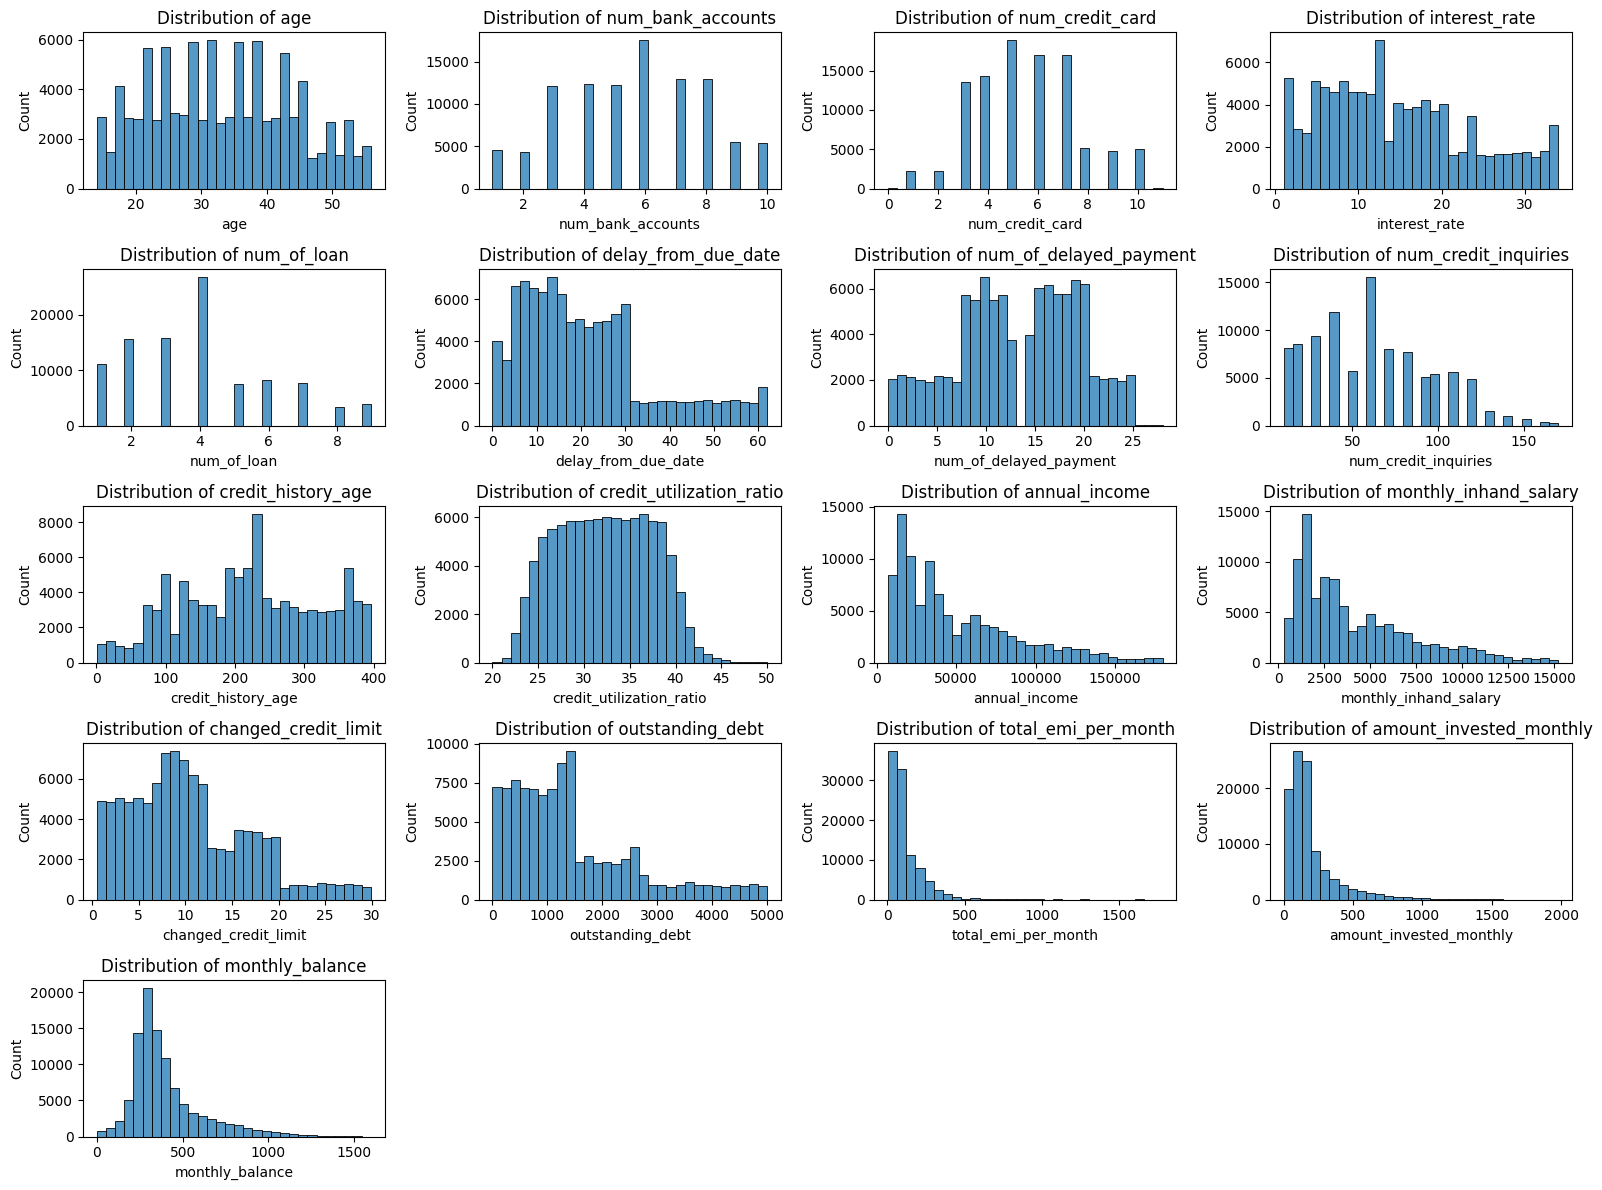

In [32]:
# Examining distribution of the numeric columns with histograms

n_rows = 5
n_cols = 4

# Creating subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))

# Flatten the axes array to iterate over all subplots
axes = axes.flatten()

# Loop through the features and create histplots
for i, feature in enumerate(numeric_columns):
    sns.histplot(data=transformed_df, x=feature, bins=30, ax=axes[i])

    axes[i].set_title(f'Distribution of {feature}')

# Hide any remaining empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()  # Ensure proper spacing
plt.show()

## Feature Analyzing

In [33]:
class FeatureAnalyzer():
    '''
    This class provides methods to analyze numerical columns in a DataFrame, including statistics such as mean,
    median, standard deviation, variance, kurtosis, skewness, maximum, minimum, and count of zeros.

    Args:
        input_df (pd.DataFrame): The DataFrame containing the numerical columns to be analyzed.

    Methods:
        column_statistics(columns): Calculates statistics for the specified columns.

    '''
    def __init__(self, input_df):
        self.df = input_df

    def column_statistics(self, columns):
        '''
        Calculate statistics for the specified columns.

        Args:
            columns (list of str): A list of column names to analyze.

        Returns:
            pd.DataFrame: A DataFrame containing statistics for the specified columns.

        Example:
            analyzer = FeatureAnalyzer(data_frame)
            stats = analyzer.column_statistics(['age', 'income'])
        '''
        
        invalid_columns = [col for col in columns if col not in self.df.columns]
        if invalid_columns:
            print("Invalid columns:", invalid_columns)
            return
        
        stats_dict = {}
        
        for column in columns:
            # Replace non-numeric values with NaN
            numeric_values = pd.to_numeric(self.df[column], errors='coerce')
            
            count_of_zeros = (numeric_values == 0).sum()
            std = numeric_values.std()
            variance = numeric_values.var()
            mean = numeric_values.mean()
            median = numeric_values.median()
            kurt = kurtosis(numeric_values).round(2)
            skewness = skew(numeric_values).round(2)
            maximum = numeric_values.max()
            minumum = numeric_values.min()            
            
            stats_dict[column] = {
                'Count of Zeros': count_of_zeros,
                'Standard Deviation': std,
                'Variance': variance,
                'Mean': mean,
                'Median': median,
                'Kurtosis': kurt,
                'Skewness': skewness,
                'Max Value': maximum,
                'Min Value': minumum                
            }
            
        return pd.DataFrame.from_dict(stats_dict, orient='index')

### Before NumericTransformer implemented.

In [34]:
analyzer1 = FeatureAnalyzer(input_df=df)

In [35]:
analyzer1.column_statistics(numeric_columns)

,Count of Zeros,Standard Deviation,Variance,Mean,Median,Kurtosis,Skewness,Max Value,Min Value
age,0,6.894079e+02,4.752832e+05,110.934505,33.000000,NaN,NaN,8.698000e+03,-500.000000
num_bank_accounts,4328,1.174048e+02,1.378390e+04,17.091280,6.000000,132.50,11.20,1.798000e+03,-1.000000
num_credit_card,13,1.290574e+02,1.665582e+04,22.474430,5.000000,74.54,8.46,1.499000e+03,0.000000
interest_rate,0,4.664226e+02,2.175501e+05,72.466040,13.000000,85.18,9.01,5.797000e+03,1.000000
num_of_loan,10380,6.250094e+01,3.906368e+03,2.780339,3.000000,NaN,NaN,1.496000e+03,-100.000000
delay_from_due_date,1195,1.486010e+01,2.208227e+02,21.068780,18.000000,0.35,0.97,6.700000e+01,-5.000000
num_of_delayed_payment,1568,2.269558e+02,5.150892e+04,31.033051,14.000000,NaN,NaN,4.397000e+03,-3.000000
num_credit_inquiries,6972,1.931773e+02,3.731748e+04,27.754251,6.000000,NaN,NaN,2.597000e+03,0.000000
credit_history_age,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_utilization_ratio,0,5.116875e+00,2.618241e+01,32.285173,32.305784,-0.94,0.03,5.000000e+01,20.000000


### NumericTransformer implemented (no standardization)

In [36]:
analyzer2 = FeatureAnalyzer(input_df=transformed_df)

In [37]:
analyzer2.column_statistics(numeric_columns)

,Count of Zeros,Standard Deviation,Variance,Mean,Median,Kurtosis,Skewness,Max Value,Min Value
age,0,10.764438,1.158731e+02,33.274560,33.00000,-0.93,0.16,56.0000,14.0000
num_bank_accounts,0,2.325141,5.406281e+00,5.631200,6.00000,-0.73,-0.06,10.0000,1.0000
num_credit_card,16,2.067657,4.275207e+00,5.532800,5.00000,-0.33,0.23,11.0000,0.0000
interest_rate,0,8.741330,7.641085e+01,14.532080,13.00000,-0.68,0.50,34.0000,1.0000
num_of_loan,0,2.092235,4.377447e+00,3.989200,4.00000,-0.28,0.60,9.0000,1.0000
delay_from_due_date,1360,14.757481,2.177832e+02,21.054240,18.00000,0.36,0.99,62.0000,0.0000
num_of_delayed_payment,2056,6.187195,3.828138e+01,13.278640,14.00000,-0.66,-0.23,28.0000,0.0000
num_credit_inquiries,0,35.162512,1.236402e+03,61.787200,60.00000,-0.45,0.48,170.0000,10.0000
credit_history_age,0,99.580975,9.916371e+03,220.156240,216.00000,-0.90,-0.05,397.0000,1.0000
credit_utilization_ratio,0,5.116875,2.618241e+01,32.285173,32.30580,-0.94,0.03,50.0000,20.0000


##### All columns seem fine for me. There are extreme values but let's see the model performance.

# MODELING

In [42]:
#from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier
#from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [43]:
X = transformed_df.drop('credit_score', axis=1)
y = transformed_df['credit_score']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
scaler = StandardScaler()

In [46]:
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,make_scorer, f1_score

In [48]:
models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

In [51]:
models

{'Random Forest': RandomForestClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)}

In [52]:
params = {
    "Random Forest": {
        'n_estimators': [16, 32, 64, 128],
        'max_depth': [None, 10, 20],
       # 'min_samples_split': [5, 10],
        #'min_samples_leaf': [2, 5],
        #'bootstrap': [True, False],
    },
    "XGBoost": {
        'learning_rate': [0.1, 0.05, 0.001],
        'n_estimators': [16, 32, 64, 128],
        #'max_depth': [3, 4, 5],
        'subsample': [0.7, 0.8]
    }
}


In [53]:
params

{'Random Forest': {'n_estimators': [16, 32, 64, 128],
  'max_depth': [None, 10, 20]},
 'XGBoost': {'learning_rate': [0.1, 0.05, 0.001],
  'n_estimators': [16, 32, 64, 128],
  'subsample': [0.7, 0.8]}}

In [55]:
f1_scorer = make_scorer(f1_score, average='weighted')

In [56]:
grid_searches = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(
        model,
        params[model_name],
        cv=3,  # Use the number of desired cross-validation folds
        scoring=f1_scorer,
        n_jobs=-1,  # Use all available CPU cores
        verbose=2,
    )
    grid_searches[model_name] = grid_search


In [63]:
grid_searches

{'Random Forest': GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
              param_grid={'max_depth': [None, 10, 20],
                          'n_estimators': [16, 32, 64, 128]},
              scoring=make_scorer(f1_score, average=weighted), verbose=2),
 'XGBoost': GridSearchCV(cv=3,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False, eval_metric=None,
                                      feature_types=None, gamma=None,
                                      gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
         

In [58]:
best_models = {}
for model_name, grid_search in grid_searches.items():
    grid_search.fit(X_train, y_train)  # X_train and y_train are your training data
    best_models[model_name] = grid_search.best_estimator_


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [67]:
best_models

{'Random Forest': RandomForestClassifier(n_estimators=128),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=128, n_jobs=None, num_parallel_tree=None,
               objective='multi:softprob', predictor=None, ...)}

In [61]:
best_f1_score = -1  # Initialize with a low value
best_model = None

for model_name, grid_search in grid_searches.items():
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best F1-score for {model_name}: {grid_search.best_score_}")
    print("=="*25,"\n")

    if grid_search.best_score_ > best_f1_score:
        best_f1_score = grid_search.best_score_
        best_model = grid_search.best_estimator_

if best_model is not None:
    print("Best model based on F1-score:")
    print(best_model)
    print(f"Best F1-score: {best_f1_score}")

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 128}
Best F1-score for Random Forest: 0.8064708100439427

Best parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 128, 'subsample': 0.7}
Best F1-score for XGBoost: 0.7523171848969364

Best model based on F1-score:
RandomForestClassifier(n_estimators=128)
Best F1-score: 0.8064708100439427


In [64]:
from sklearn.metrics import classification_report, confusion_matrix

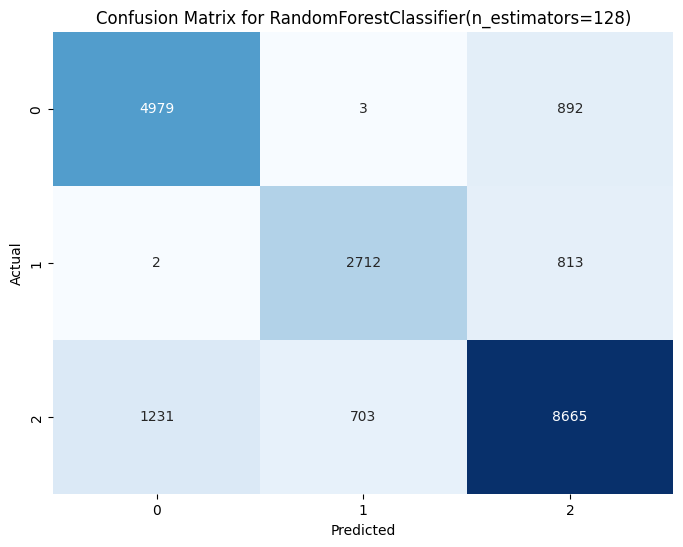

Classification Report for RandomForestClassifier(n_estimators=128):

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      5874
           1       0.79      0.77      0.78      3527
           2       0.84      0.82      0.83     10599

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000



In [65]:
y_pred = best_model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Plot a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model}')
plt.show()

# Print the classification report
print(f"Classification Report for {best_model}:\n")
print(report)

## This confusion matrix means that;

### Class 0 (Poor):
* Actual Count: 5874
* Correctly Predicted as Poor: 5004
* Incorrectly Predicted as Good: 3
* Incorrectly Predicted as Standard: 867

### Class 1 (Good):
* Actual Count: 3527
* Correctly Predicted as Good: 2708
* Incorrectly Predicted as Poor: 3
* Incorrectly Predicted as Standard: 816

### Class 2 (Standard):
* Actual Count: 10599
* Correctly Predicted as Standard: 8684
* Incorrectly Predicted as Poor: 1219
* Incorrectly Predicted as Good: 696

In [ ]:
'''
FOR THOSE WHO WANT TO FIND OUT IF THERE IS ANY CHANCE TO HAVE BETTER OPTIONS.
IF YOU WANT TO EXPLORE MORE JUST REPLACE models and params WITH REAL ONES.
'''

# models = {
#     "Random Forest": RandomForestClassifier(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     ,
#     "XGBoost": XGBClassifier(),
#     "CatBoost": CatBoostClassifier(verbose=False),
#     "AdaBoost": AdaBoostClassifier(),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
# }


# params = {
#     "Random Forest": {
#         'n_estimators': [8, 16, 32, 64, 128, 256],
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#         'bootstrap': [True, False],
#     },
#     "Decision Tree": {
#         'criterion': ['gini', 'entropy'],
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#     },
#     "Gradient Boosting": {
#         'learning_rate': [0.1, 0.01, 0.001],
#         'n_estimators': [8, 16, 32, 64, 128, 256],
#         'max_depth': [3, 4, 5],
#         'subsample': [0.6, 0.7, 0.8, 0.9],
#     },
#     "Logistic Regression": {
#         'penalty': ['l1', 'l2'],
#         'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     },
#     "XGBoost": {
#         'learning_rate': [0.1, 0.01, 0.05, 0.001],
#         'n_estimators': [8, 16, 32, 64, 128, 256],
#         'max_depth': [3, 4, 5],
#         'subsample': [0.6, 0.7, 0.8, 0.9],
#     },
#     "CatBoost": {
#         'depth': [6, 8, 10],
#         'learning_rate': [0.01, 0.05, 0.1],
#         'iterations': [30, 50, 100],
#     },
#     "AdaBoost": {
#         'learning_rate': [0.1, 0.01, 0.5, 0.001],
#         'n_estimators': [8, 16, 32, 64, 128, 256],
#     },
#     "K-Nearest Neighbors": {
#         'n_neighbors': [3, 5, 7, 9],
#         'weights': ['uniform', 'distance'],
#         'p': [1, 2],
#     },
# }